In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Plot colors
def get_region(id):
    id = int(id)
    if id == 186:
        return "green"
    elif id < 75:
        return "gray"
    elif id >= 75 and id < 150:
        return "red"
    elif id >= 150 and id < 250 and id != 186:
        return "blue"
    elif id >= 250:
        return "purple"
    
def plot_feature_importances(model, x, y, title, append):
    # Permutation feature importances
    result = permutation_importance(model, x, y, n_repeats=100, random_state=0)
    
    # Read the feature importance into a data frame and get the region from each feature
    df = pd.DataFrame({'feature_name': x.columns, 'feature_importance': result.importances_mean})
    df2 = df[df["feature_importance"] > 0].dropna().sort_values(by=['feature_importance'], ascending=False)
    colors = [get_region(i.split("_")[0]) for i in df2["feature_name"].values]
    
    # Plotting time
    plt.figure(figsize=(8, 8))
    ax = sns.barplot(data= df2, x='feature_importance', y='feature_name', palette=colors)
    c = 0
    
    # Get rid of things that are close to zero - keep in mind that this does not match what the mathematica plot does
    # Need to update such that all avg values (minus std) greater than 0 are kept
    for i in ax.containers:
        if i.datavalues[0] < 0.0002:
            i.datavalues[0] = np.round(i.datavalues[0],4)
            ax.bar_label(i, color=colors[c])
        c = c + 1
    plt.title(title)
    
    # Save the feature importance plot
    plt.savefig(f"feature_importances_{append}.jpg")
    
    # Return the feature importance values for the mathematica plot
    return result

[<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]
[0.0002]
[0.0001]
[0.]
[0.]


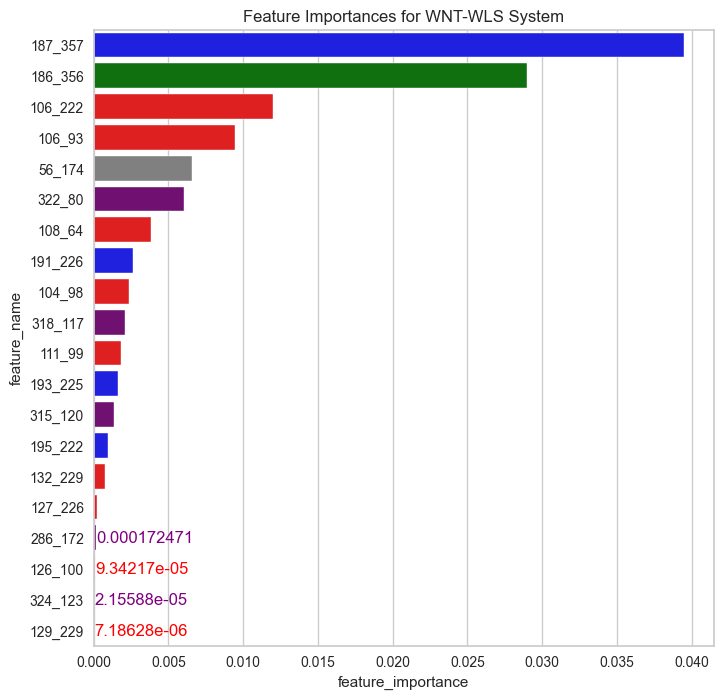

In [7]:
# Test dataset
X_test = pd.read_csv('../07_model_eval/model/X_test_dt10_4.csv').iloc[:,:-2]
Y_test = pd.read_csv('../07_model_eval/model/X_test_dt10_4.csv').iloc[:,-2]

# Train dataset
X_train = pd.read_csv('../07_model_eval/model/X_train_dt10_4.csv').iloc[:,:-2]
Y_train = pd.read_csv('../07_model_eval/model/X_train_dt10_4.csv').iloc[:,-2]

# Optimized Parameters
nestimators = 10
maxdepth = 3
leaf = 4021

# Pipeline with fixed random seed
rf_pipeline = Pipeline(steps = [
    ("standardize", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=9, max_depth=maxdepth,  n_estimators=nestimators, min_samples_leaf=leaf))
])

# Fit to the train data
rf_pipeline.fit(X_train, Y_train)

# Feature importances on the test data
r = plot_feature_importances(rf_pipeline, X_test, Y_test, 'Feature Importances for WNT-WLS System', "all")

# Print out the important features for mathematica plot
x = pd.DataFrame(np.transpose(r.importances), columns=X_test.columns)
x.to_csv("feature_importances.txt", sep="\t",index=False)

In [5]:
# Extra - read in the subclustering data frame

subclusters = pd.read_pickle('../07_preprocess/output/clusterbyindex_df.pkl').set_index("clusteridx")

In [7]:
subclusters[["nPoints","nSubClusters","SS"]]

,nPoints,nSubClusters,SS
clusteridx,,,
0,68,21,0.298572
1,51,3,0.301440
2,106,38,0.308091
3,111,2,0.435468
4,64,3,0.278968
5,0,0,0.000000
6,64,23,0.354580
7,40,11,0.375877
8,58,22,0.373345
